In [1]:
# MUST AT LEAST RUN THIS ONE TO GET THE DATA VARIABLE. OTHERS ARE OPTIONAL.
%matplotlib inline
from pyspark.sql import Row
from pyspark import SparkContext
import seaborn as sns
import re
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
from datetime import datetime
from pyspark.sql.functions import col,udf, unix_timestamp
from pyspark.sql.types import DateType
from pyspark.sql.functions import udf
from pyspark.sql.types import DataType
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DoubleType
import locale
from pyspark.sql.functions import split, explode

data = spark.read.csv('Final Project Data_Case.csv', header=True, inferSchema=True)


DataFrame[age: int, female: int, flu_season: int, ed_admit: int, severity score: int, comorbidity score: int, readmit30: int]

In [47]:
x = data.describe()
x = x.withColumn('age', x.age.substr(0,5))
x = x.withColumn('female', x.female.substr(0,5))
x = x.withColumn('flu_season', x.flu_season.substr(0,5))
x = x.withColumn('ed_admit', x.ed_admit.substr(0,5))
x = x.withColumn('severity score', x['severity score'].substr(0,5))
x = x.withColumn('comorbidity score', x['comorbidity score'].substr(0,5))
x = x.withColumn('readmit30', x['readmit30'].substr(0,5))
x.show()

+-------+-----+------+----------+--------+--------------+-----------------+---------+
|summary|  age|female|flu_season|ed_admit|severity score|comorbidity score|readmit30|
+-------+-----+------+----------+--------+--------------+-----------------+---------+
|  count| 4382|  4382|      4382|    4382|          4382|             4382|     4382|
|   mean|76.84| 0.469|     0.408|   0.809|         22.35|            94.73|    0.227|
| stddev|7.904| 0.499|     0.491|   0.392|         18.00|            57.14|    0.419|
|    min|   65|     0|         0|       0|             1|                1|        0|
|    max|  105|     1|         1|       1|           112|              322|        1|
+-------+-----+------+----------+--------+--------------+-----------------+---------+



"Women make up a significant majority of the older population; the female share increases with age." Figure 28 shows that there are 58 males for every 100 females at 80 yrs old.
http://www.un.org/esa/population/publications/worldageing19502050/pdf/90chapteriv.pdf



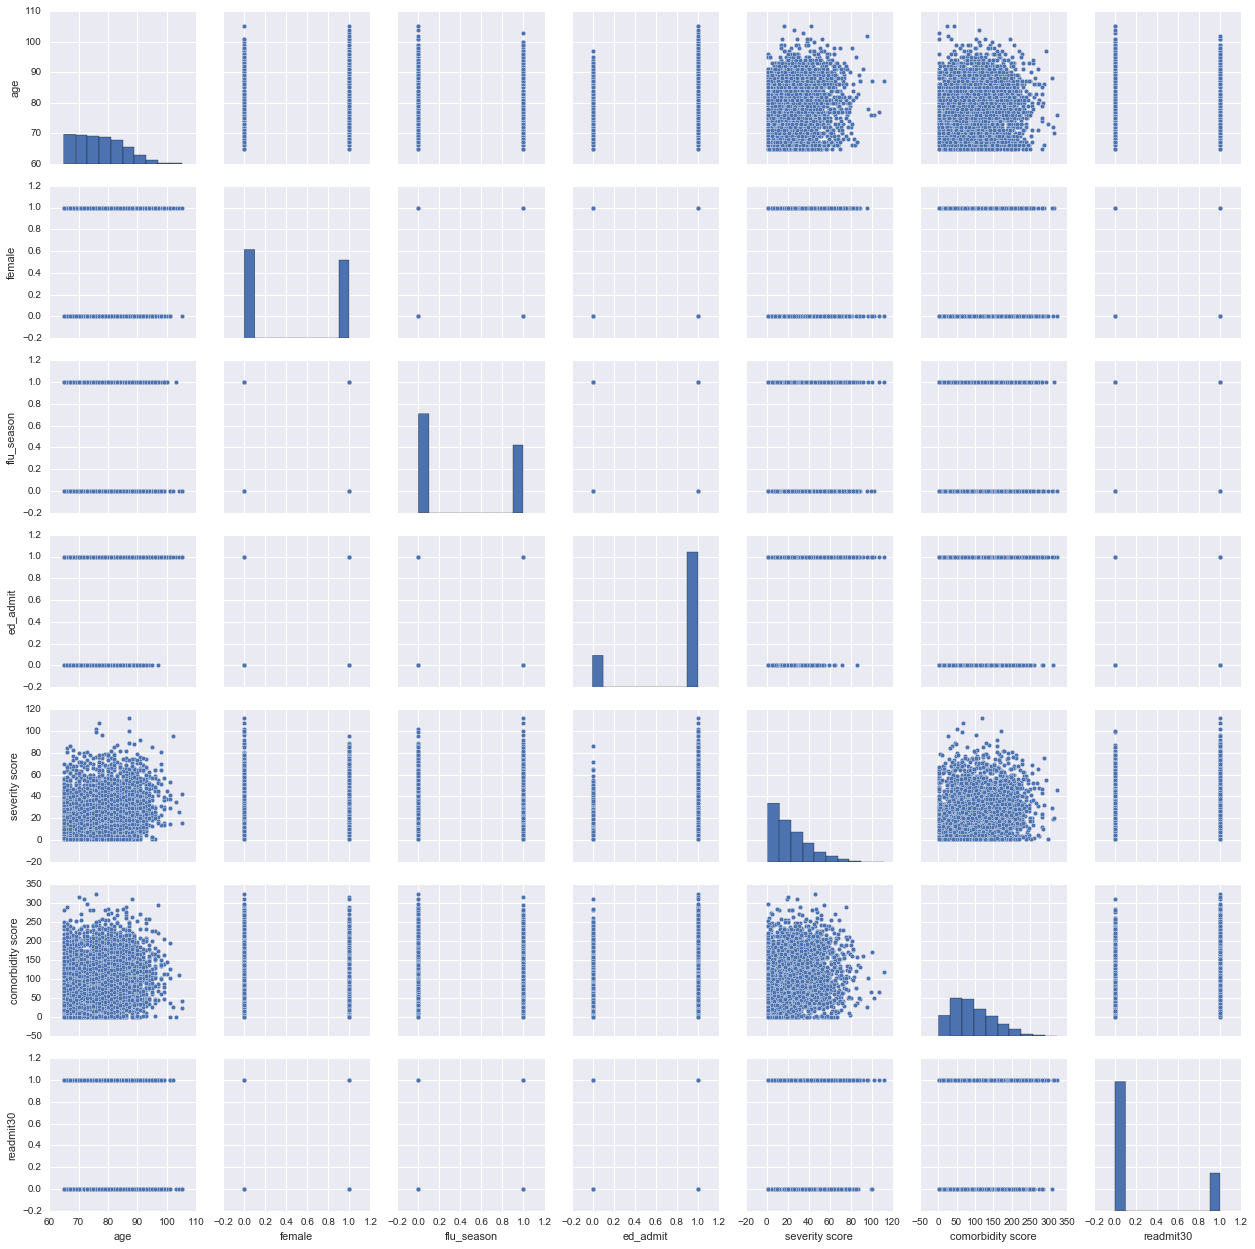

In [48]:
sns.pairplot(data.toPandas())